# Informe de Laboratorio 2 - Evaluación de Segmentación
**Asignatura:** Percepción Computacional  
**Autor:** Camilo Alfonso Ferro Camelo  
**Fecha:** 19/09/2025  
Implementación práctica de diferentes técnicas de segmentación de imágenes y la comparación de resultados.


## Objetivo
Implementar y evaluar 3 métodos de segmentación de imágenes (umbralización, clustering y análisis de histograma), comparando sus resultados.

In [1]:
# Librerias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import files


Saving Golden bajista.jpg to Golden bajista.jpg


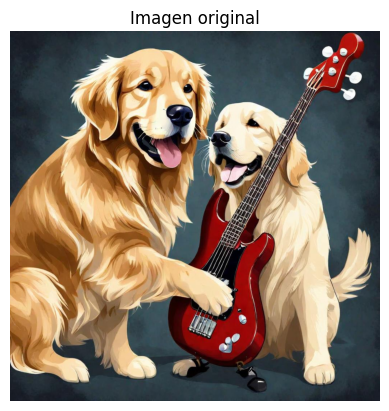

In [2]:
#Cargar imagen
uploaded = files.upload()
image_filename = next(iter(uploaded))
img = cv2.imread(image_filename)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Imagen original")
plt.axis("off")
plt.show()


In [3]:
# Declarar Funciones Globales

# Métrica IoU (Intersection over Union)
def iou_score(y_true, y_pred):
    inter = np.logical_and(y_true, y_pred).sum()
    union = np.logical_or(y_true, y_pred).sum()
    return inter / union if union != 0 else 0

# Visualización comparativa
def show_results(original, segmented, ground=None, title="Segmentación"):
    fig, axs = plt.subplots(1,3 if ground is not None else 2, figsize=(15,5))
    axs[0].imshow(original); axs[0].set_title("Original"); axs[0].axis("off")
    axs[1].imshow(segmented, cmap="nipy_spectral"); axs[1].set_title(title); axs[1].axis("off")
    if ground is not None:
        axs[2].imshow(ground, cmap="gray"); axs[2].set_title("Ground Truth"); axs[2].axis("off")
    plt.show()


## Técnica 1: Segmentación por Umbralización (Otsu)

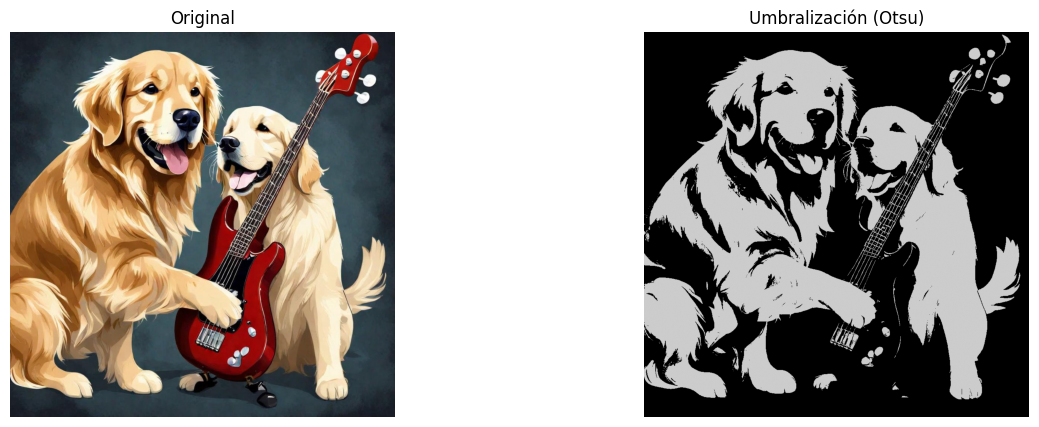

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Mostrar resultados
show_results(img_rgb, thresh, title="Umbralización (Otsu)")


## Técnica 2: Segmentación por Clustering (K-Means)

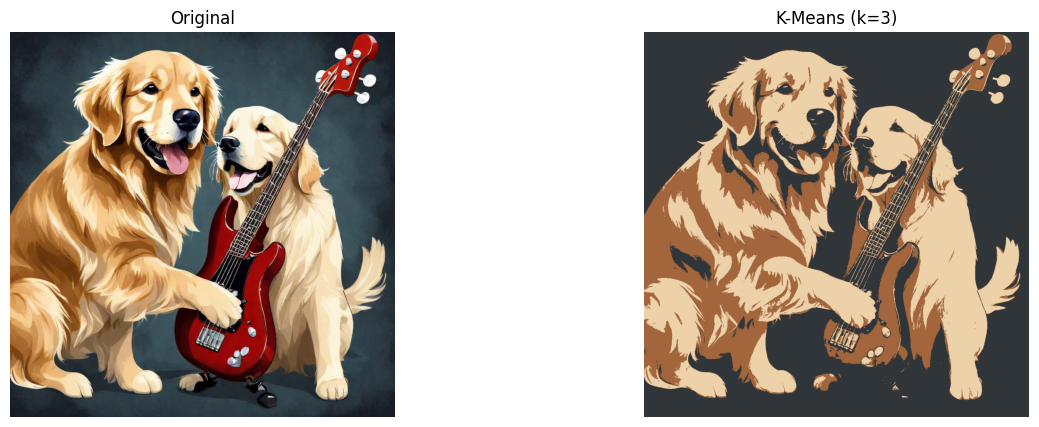

In [5]:
# Reorganizar imagen en lista de píxeles
Z = img_rgb.reshape((-1,3))
Z = np.float32(Z)

# Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(Z)
centers = np.uint8(kmeans.cluster_centers_)

# Reconstruir imagen segmentada
segmented = centers[labels.flatten()].reshape(img_rgb.shape)

# Mostrar resultados
show_results(img_rgb, segmented, title="K-Means (k=3)")


## Técnica 3: Segmentación por Histograma

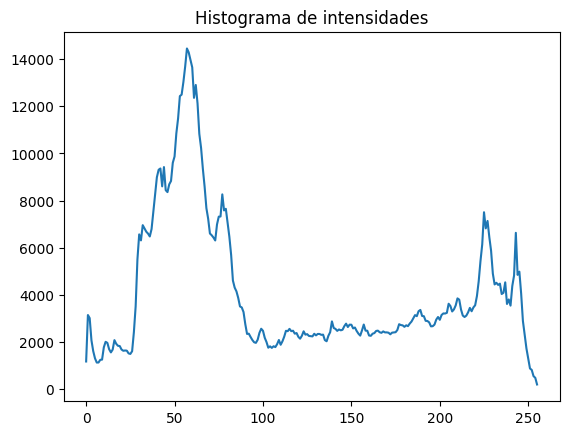

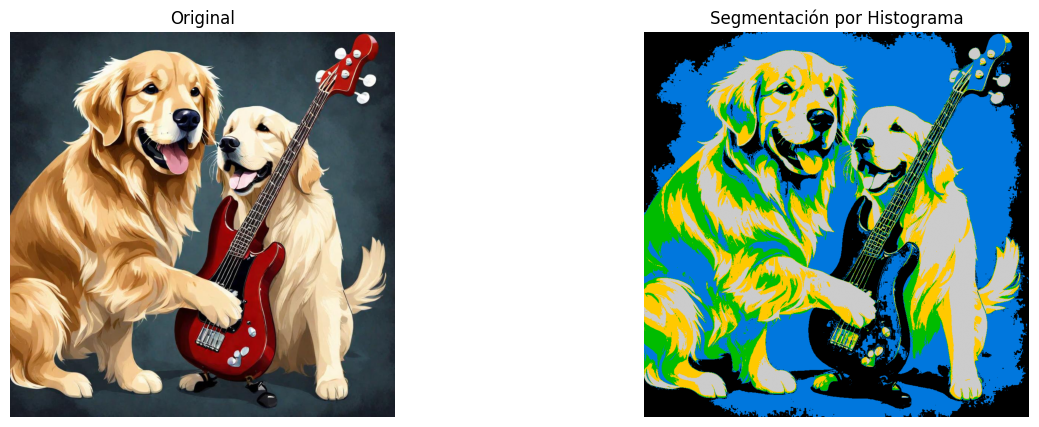

In [7]:
# Calcular histograma
hist = cv2.calcHist([gray],[0],None,[256],[0,256])

plt.plot(hist)
plt.title("Histograma de intensidades")
plt.show()

# Dividir intensidades en 5 intervalos
bins = np.linspace(0,256,6)
seg_img = np.zeros_like(gray)

for i in range(5):
    mask = (gray >= bins[i]) & (gray < bins[i+1])
    seg_img[mask] = int((i+1)*50)

# Mostrar resultados
show_results(img_rgb, seg_img, title="Segmentación por Histograma")


## Conclusiones
- Se aplicaron tres técnicas distintas de segmentación: Umbralización (Otsu), Clustering (K-Means) y Segmentación por Histograma.
- Cada técnica mostró ventajas y limitaciones según la imagen analizada.
- La elección del segmentador depende del tipo de imagen, condiciones de iluminación y el objetivo del análisis.
